In [1]:
import pandas as pd
import re
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',20)

In [2]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')

In [3]:
file_Df = pd.read_csv('imdb_boxOffice.csv')

In [4]:
#TO GET THE YEAR FROM EACH TITLE 
def getYear(title:str) -> str:
    pattern = re.compile(r"\(\d+\)")
    data = pattern.search(title)
    return data.group(0).strip("()")

In [5]:
getYear('Three Billboards Outside Ebbing, Missouri(2017)')

'2017'

In [6]:
file_Df[["Title","Year"]] = file_Df.Title.str.extract(r"(.*)(\(\d+\))",expand=True)

In [7]:
imdb_df = file_Df.sort_values(by="Position",ascending=True)

In [8]:
imdb_df["Year"] = imdb_df["Year"].apply(lambda x: int(x.strip("()")))

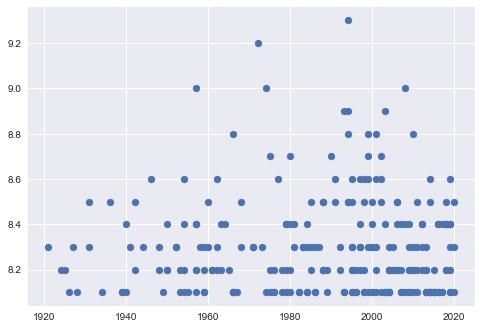

In [9]:
plt.scatter(imdb_df.Year,imdb_df.Rating)

<BarContainer object of 250 artists>

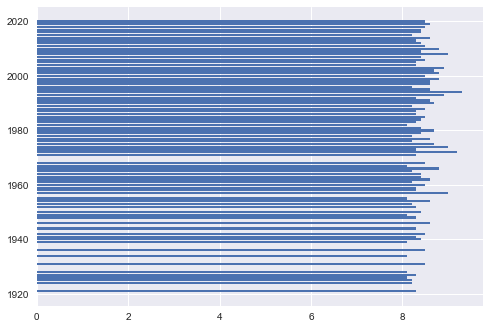

In [11]:
plt.barh(imdb_df.Year,imdb_df.Rating)

In [13]:
imdb_na = imdb_df.dropna(how='all')

In [18]:
imdb_na

,Position,Title,Rating,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,Year
0,1,The Shawshank Redemption,9.3,"$25,000,000","$727,327","$28,699,976","$28,817,291",1994
1,2,The Godfather,9.2,"$6,000,000","$302,393","$134,966,411","$246,120,986",1972
3,3,The Godfather: Part II,9.0,"$13,000,000","$171,417","$47,834,595","$48,035,783",1974
2,4,The Dark Knight,9.0,"$185,000,000","$158,411,483","$534,858,444","$1,005,973,645",2008
4,5,12 Angry Men,9.0,"$350,000",NaN,NaN,$955,1957
...,...,...,...,...,...,...,...,...
130,246,Mandariinid,8.2,"EUR650,000","$5,180","$144,501","$1,024,132",2013
136,247,Drishyam,8.2,"$9,400,000",NaN,NaN,NaN,2015
184,248,La battaglia di Algeri,8.1,"$800,000","$64,870","$879,794","$964,028",1966
134,249,"Swades: We, the People",8.2,NaN,"$424,804","$1,223,240","$1,953,889",2004


In [19]:
imdb_na[["Budget","Cumulative Worldwide Gross"]]

,Budget,Cumulative Worldwide Gross
0,"$25,000,000","$28,817,291"
1,"$6,000,000","$246,120,986"
3,"$13,000,000","$48,035,783"
2,"$185,000,000","$1,005,973,645"
4,"$350,000",$955
...,...,...
130,"EUR650,000","$1,024,132"
136,"$9,400,000",NaN
184,"$800,000","$964,028"
134,NaN,"$1,953,889"


In [20]:
imdb_na.drop(imdb_na[(imdb_na["Budget"].isna() | (~imdb_na["Budget"].str.startswith('$',na=False))) ].index,inplace=False)

,Position,Title,Rating,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,Year
0,1,The Shawshank Redemption,9.3,"$25,000,000","$727,327","$28,699,976","$28,817,291",1994
1,2,The Godfather,9.2,"$6,000,000","$302,393","$134,966,411","$246,120,986",1972
3,3,The Godfather: Part II,9.0,"$13,000,000","$171,417","$47,834,595","$48,035,783",1974
2,4,The Dark Knight,9.0,"$185,000,000","$158,411,483","$534,858,444","$1,005,973,645",2008
4,5,12 Angry Men,9.0,"$350,000",NaN,NaN,$955,1957
...,...,...,...,...,...,...,...,...
239,235,Rebecca,8.1,"$1,288,000",NaN,NaN,"$72,275",1940
195,236,Before Sunset,8.1,"$2,700,000","$219,425","$5,820,649","$15,936,507",2004
198,244,It Happened One Night,8.1,"$325,000",NaN,NaN,NaN,1934
136,247,Drishyam,8.2,"$9,400,000",NaN,NaN,NaN,2015


In [21]:
imdb_budget = imdb_na.drop(imdb_na[(imdb_na["Budget"].isna() | (~imdb_na["Budget"].str.startswith('$',na=False))) ].index,inplace=False)

In [36]:
imdb_budget.drop(["Opening Weekend USA","Gross USA","Cumulative Worldwide Gross"],axis=1,inplace=True) #Dropping unwanted columns

KeyError: "['Opening Weekend USA' 'Gross USA' 'Cumulative Worldwide Gross'] not found in axis"

In [37]:
imdb_budget["Budget"] = imdb_budget["Budget"].str.replace("$","")

In [38]:
imdb_budget["Budget"] = imdb_budget["Budget"].str.replace(",","")

In [54]:
imdb_two = imdb_budget[imdb_budget["Year"] >= 2000 ]

In [43]:
imdb_ninety = imdb_budget[imdb_budget["Year"] < 2000]

In [46]:
"""The average budget of both movies released before 2000s and after 2000s are """

'The average budget of both movies released before 2000s and after 2000s are '

In [52]:
imdb_ninety["Budget"].astype("int").mean() #meaning avg budget of movies relased in 2000s was $68,757,692

68757692.3076923

In [55]:
imdb_two["Budget"].astype("int").mean() #avg budget of movies released in 2000s uptil now is 15,323,432

68757692.3076923